In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
from datetime import datetime,date
import seaborn as sns
import folium
from IPython.display import HTML

In [7]:
ds = pd.read_csv('data scientist.csv',index_col=False)
del ds['Unnamed: 0']

<h2>Posting Dates

We get these data on Mar 4th 2017, and we want to know the posting date of these jobs.

In [95]:
Counter(ds['post_date']).keys()

['02/17/2017',
 '03/03/2017',
 '01/04/2017',
 '01/17/2017',
 '02/02/2017',
 '02/03/2017',
 '12/14/2016',
 '01/09/2017',
 '02/20/2017',
 '02/23/2017',
 '01/30/2017',
 '03/01/2017',
 '03/04/2017',
 '02/28/2017']

In [98]:
Counter(ds['post_date'])

Counter({'01/04/2017': 1,
         '01/09/2017': 1,
         '01/17/2017': 1,
         '01/30/2017': 1,
         '02/02/2017': 1,
         '02/03/2017': 1,
         '02/17/2017': 1,
         '02/20/2017': 1,
         '02/23/2017': 21,
         '02/28/2017': 3,
         '03/01/2017': 2,
         '03/03/2017': 2,
         '03/04/2017': 72,
         '12/14/2016': 1})

Here, you can find a interesting thing. The post dates are not uniformly distributed, and most of jobs are posted on 3/4/2017 and 2/23/2017. If you open the CyberCoders web now(3/5/2017), you can find a lot of jobs, whose job id is same as the ones of yesterday, are marked as 'Posting Today'.

In [91]:
datevalues = Counter(ds['post_date']).keys()

In [92]:
datevalues = [datetime.strptime(i,'%m/%d/%Y') for i in datevalues]

In [155]:
[datetime(2017,3,4)-i for i in datevalues]

[datetime.timedelta(15),
 datetime.timedelta(1),
 datetime.timedelta(59),
 datetime.timedelta(46),
 datetime.timedelta(30),
 datetime.timedelta(29),
 datetime.timedelta(80),
 datetime.timedelta(54),
 datetime.timedelta(12),
 datetime.timedelta(9),
 datetime.timedelta(33),
 datetime.timedelta(3),
 datetime.timedelta(0),
 datetime.timedelta(4)]

The oldest job is posted on 12/14/2016, 80 days ago.However, most jobs are posted in recent 10 days.

In [4]:
ds['post_date'] = pd.to_datetime(ds['post_date'])

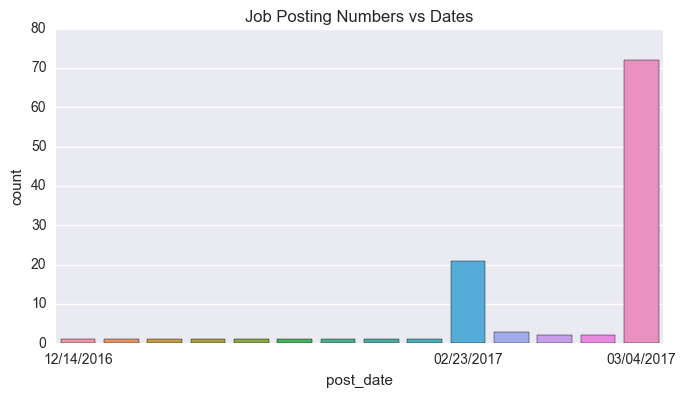

In [237]:
plot = sns.factorplot('post_date',kind = 'count',data = ds,size=4, aspect=2)
plot.set(xticklabels=['12/14/2016','','','','','','','','','02/23/2017','','','','03/04/2017'])
plt.title('Job Posting Numbers vs Dates')
plt.show()

<h2>Location

In the original dataset, we have the state and the city of each job posting. Then we need to job the cooresponding coordinates for them:

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.geocode("New York, NY")
loc

Location((40.7305991, -73.9865811, 0.0))

In [9]:
ds['location'] = ds['city']+','+ds['state']

In [11]:
lonlat = [geolocator.geocode(i) for i in ds.location]

In [12]:
lonlat[2]

Location((47.5766324, -122.2276377, 0.0))

Frequency table for the states of data scientist jobs:

In [13]:
Counter(ds['state'])

Counter({'AZ': 1,
         'CA': 51,
         'CO': 1,
         'CT': 2,
         'DC': 3,
         'FL': 1,
         'IL': 2,
         'KY': 1,
         'MA': 8,
         'MD': 4,
         'MO': 1,
         'NY': 14,
         'OH': 2,
         'OR': 1,
         'PA': 1,
         'SC': 1,
         'TX': 1,
         'VA': 2,
         'WA': 12})

In [8]:
import folium
from IPython.display import HTML
from IPython.display import IFrame

The map for the data scientist job:

In [9]:
#Try
mapds = folium.Map(location=[39,-98.35], zoom_start=4)
marker_cluster = folium.MarkerCluster("Data Scientist Job").add_to(mapds)
for each in lonlat:
    folium.Marker(each[1]).add_to(marker_cluster)
    folium.MarkerCluster()
mapds.save('map.html')
IFrame('map.html', width=800, height=500)

The map is a seperate html file, whose name is map.html.

In [11]:
sum(pd.isnull(ds['salary_lower']))

32

In the 109 records, 32 have NaN salary and some of the salaries are 0.We want to delete them:

In [12]:
ds2 = ds[pd.notnull(ds['salary_lower'])].copy()

In [13]:
ds2 = ds2[ds2.salary_lower>0]
#Only 74 records now

In [21]:
ds2['salary_mid']=(ds.salary_lower+ds.salary_upper)/2

In [15]:
Counter(ds2.state)

Counter({'AZ': 1,
         'CA': 36,
         'CO': 1,
         'CT': 2,
         'IL': 2,
         'MA': 7,
         'MD': 2,
         'MO': 1,
         'NY': 12,
         'OH': 1,
         'OR': 1,
         'PA': 1,
         'SC': 1,
         'TX': 1,
         'VA': 1,
         'WA': 4})

We want to compare the salaries of east, west and other parts of US:

In [47]:
d={}
d['east']=['CT','MA','MD','NY','PA','SC','VA','ME','VT','NH','RI','NJ','DE','WV','NC','GA','AL']
d['west']=['CA','OR','WA','AK','MO','ID','MT','NV','UT','WY']
d['other']=['AZ','CO','IL','OH','TX']

In [48]:
ds2['part']=''

In [49]:
index = [i in d['east'] for i in ds2.state]
index2 = [i in d['west'] for i in ds2.state]
index3 = [i in d['other'] for i in ds2.state]
ds2.loc[index,'part']='east'
ds2.loc[index2,'part']='west'
ds2.loc[index3,'part']='other'

In [50]:
Counter(ds2.part)

Counter({'east': 26, 'other': 6, 'west': 42})

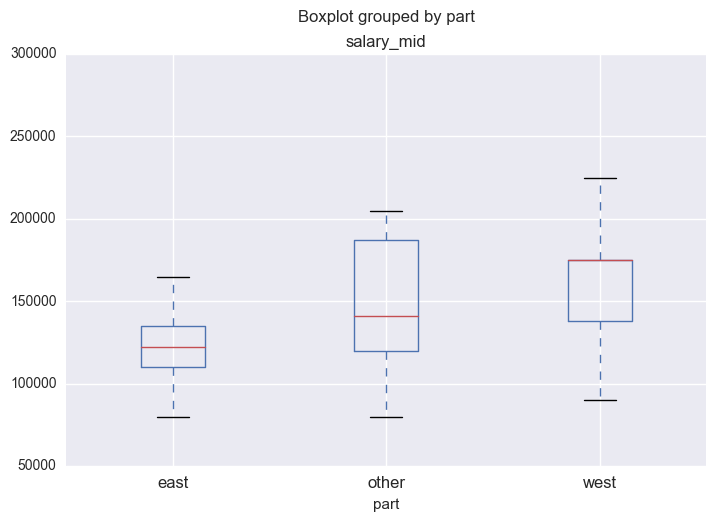

In [51]:
ds2.boxplot("salary_mid", "part")
plt.show()

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('salary_mid ~ part',
                data=ds2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                sum_sq    df         F    PR(>F)
part      1.424035e+10   2.0  5.454681  0.006256
Residual  9.267865e+10  71.0       NaN       NaN


In [53]:
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     5.455
Date:                Mon, 06 Mar 2017   Prob (F-statistic):            0.00626
Time:                        17:04:34   Log-Likelihood:                -880.09
No. Observations:                  74   AIC:                             1766.
Df Residuals:                      71   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.327e+05   7085.557     18.727

Consistent with the boxplot, the salary of east and mid have no significant difference, but the west are obviously different from them.

Now, let us comapre to SDE.

In [31]:
sde = pd.read_csv('Software_Engineer.csv',index_col=False)
del sde['Unnamed: 0']

In [34]:
sde2 = sde[pd.notnull(sde['salary_lower'])].copy()

In [35]:
sde2 = sde2[sde2.salary_lower>0]

In [36]:
len(sde)

200

In [37]:
len(sde2)

157

Same as before, we delete the NaN and 0 salaries records, now we only have 157 records for SDE.

In [38]:
sde2 = sde2[sde2.salary_lower>0]

In [39]:
sde2['salary_mid']=(sde2.salary_lower+sde2.salary_upper)/2

In [46]:
Counter(sde2.state)

Counter({'AL': 2,
         'AZ': 3,
         'BC': 1,
         'CA': 41,
         'CO': 1,
         'CT': 1,
         'DC': 2,
         'FL': 4,
         'GA': 1,
         'IA': 1,
         'IL': 4,
         'KS': 1,
         'LA': 2,
         'MA': 11,
         'MD': 15,
         'MI': 3,
         'MN': 1,
         'MO': 3,
         'NC': 1,
         'NE': 2,
         'NH': 3,
         'NJ': 4,
         'NY': 11,
         'OH': 1,
         'OK': 2,
         'ON': 2,
         'PA': 1,
         'SC': 1,
         'TN': 1,
         'TX': 13,
         'UT': 2,
         'VA': 7,
         'WA': 9})

In [54]:
sde2['part']='other'
index = [i in d['east'] for i in sde2.state]
index2 = [i in d['west'] for i in sde2.state]
sde2.loc[index,'part']='east'
sde2.loc[index2,'part']='west'

Now, let us combine the dataset of data scientist and software engineer.

In [58]:
ds2['type']='Data Scientist'
sde2['type']='Software Engineer'
dssde = ds2.append(sde2)

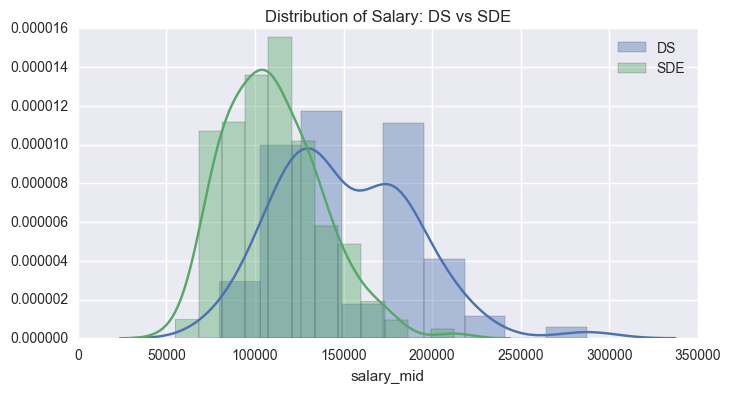

In [89]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(dssde.salary_mid[dssde['type']=='Data Scientist'],hist_kws={"label":'DS'})
sns.distplot(dssde.salary_mid[dssde['type']=='Software Engineer'],hist_kws={"label":'SDE'})
plt.title('Distribution of Salary: DS vs SDE')
plt.legend()
plt.show()

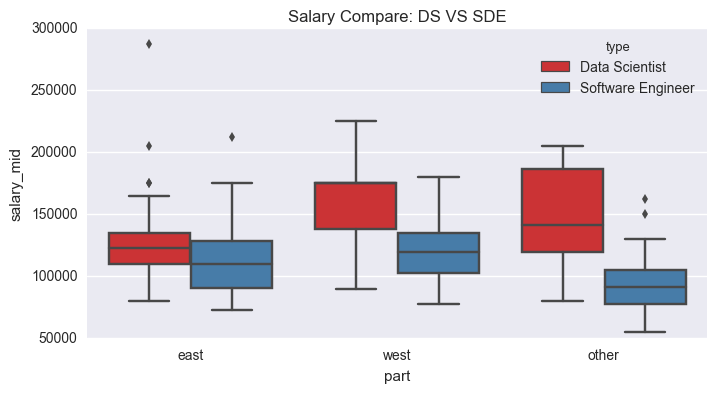

In [95]:
sns.boxplot(x="part", y="salary_mid", hue="type", data=dssde,palette="Set1")
plt.title('Salary Compare: DS VS SDE')
plt.show()

In [96]:
mod2 = ols('salary_mid ~ part+type',
                data=dssde).fit()
                
aov_table2 = sm.stats.anova_lm(mod2, typ=2)
print aov_table2

                sum_sq     df          F        PR(>F)
part      2.383304e+10    2.0  13.734130  2.341633e-06
type      5.722386e+10    1.0  65.952134  2.940663e-14
Residual  1.969583e+11  227.0        NaN           NaN


In [97]:
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           3.96e-21
Time:                        17:38:11   Log-Likelihood:                -2702.9
No. Observations:                 231   AIC:                             5414.
Df Residuals:                     227   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

Based on the results of 2-way ANOVA and regression, we have 95% confidence that the part factor and job type factor are significant. Data scientist has higher salary than SDE, west part have highest salary.

<h2>Experience

We want to know how many of the job postings specify the exact number of years of experience. We use regular expression to get this kind of info.

In [15]:
import re

In [16]:
ds.need_for_position = [i.lower() for i in ds.need_for_position] 

In [17]:
yoe= [re.findall(r'[0-9\-\\+0-9]+ years of ',i) for i in ds.need_for_position]

In [18]:
yoe[:5]

[[], [], ['3 years of '], [], []]

In [19]:
len(ds.need_for_position)- sum(i==[] for i in yoe)

49

Among the 109 jobs, 49 of them specify the years of experience.

In [20]:
from itertools import compress
yoe2 = list(compress(yoe, [i!=[] for i in yoe]))

In [21]:
del yoe2[8]

In [22]:
del yoe2[17]

In [23]:
yoe3 = [int(i[0][0]) for i in yoe2]

In [24]:
Counter(yoe3).keys()

[1, 2, 3, 4, 5, 8]

In [25]:
Counter(yoe3).values()

[2, 4, 26, 1, 13, 1]

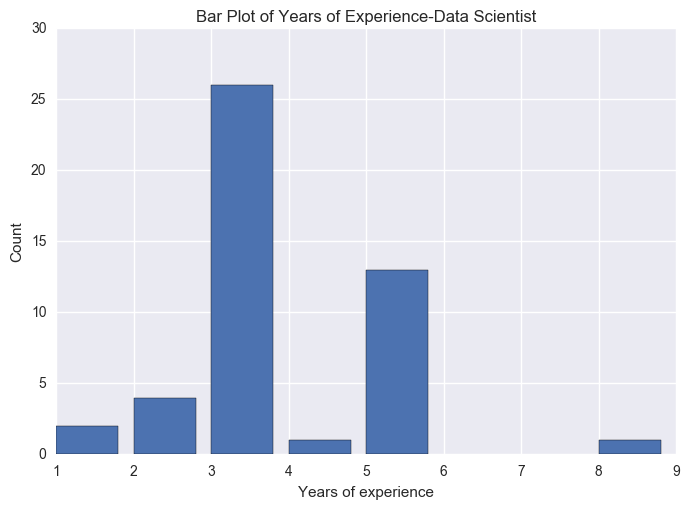

In [31]:
plt.bar(Counter(yoe3).keys(),Counter(yoe3).values())
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.title('Bar Plot of Years of Experience-Data Scientist')
plt.show()